# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [33]:
sinasc_raw.IDADEPAI.isna().value_counts()

True     19421
False     7606
Name: IDADEPAI, dtype: int64

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [20]:
medias_idade_pais = sinasc_raw.groupby(['munResNome'])['IDADEMAE', 'IDADEPAI'].mean()
medias_idade_pais

C:\Users\Tauan\AppData\Local\Temp\ipykernel_10224\1052332156.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_idade_pais = sinasc_raw.groupby(['munResNome'])['IDADEMAE', 'IDADEPAI'].mean()


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [29]:
peso_medio = sinasc_raw[sinasc_raw['DTNASC'] == '2019-02-07'].groupby(['SEXO', 'ESCMAE'])['PESO'].mean().to_frame()
peso_medio

PESO
SEXO      ESCMAE                      
Feminino  12 anos ou mais  3238.181818
          4 a 7 anos       3106.000000
          8 a 11 anos      3045.000000
Masculino 1 a 3 anos       3170.000000
          12 anos ou mais  3123.714286
          4 a 7 anos       3235.777778
          8 a 11 anos      3486.350000

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [5]:
sinasc_raw['munResNome'].value_counts().sort_values().head()

Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: munResNome, dtype: int64

#### Observação
Para esta questão, é possível observar que há um município ignorado que adquiriu o posto de menos bebês nascidos. Afim de melhorar o desenrolar do desafio, irei eliminá-lo.

In [6]:
sinasc_raw = sinasc_raw.drop(sinasc_raw[sinasc_raw['munResNome'] == 'Município ignorado - RO'].index)

In [7]:
sinasc_raw['munResNome'].value_counts().sort_values().head() # Eliminado com sucesso!

Castanheiras             32
Pimenteiras do Oeste     40
Primavera de Rondônia    43
Parecis                  44
Rio Crespo               50
Name: munResNome, dtype: int64

In [34]:
# Resolução da questão:
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']] # Criando df com as colunas de interesse.
sinasc_1 = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras'] # Filtando linha com município desejado
quest_3 = sinasc_1.groupby(['munResNome'])['IDADEMAE', 'IDADEPAI'].agg({'IDADEMAE':[('mínimo','min'),('máximo','max'), ('média','mean')], 'IDADEPAI':[('mínimo','min'),('máximo','max'), ('média','mean')]})
quest_3

C:\Users\Tauan\AppData\Local\Temp\ipykernel_10224\1491002391.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quest_3 = sinasc_1.groupby(['munResNome'])['IDADEMAE', 'IDADEPAI'].agg({'IDADEMAE':[('mínimo','min'),('máximo','max'), ('média','mean')], 'IDADEPAI':[('mínimo','min'),('máximo','max'), ('média','mean')]})


IDADEMAE                  IDADEPAI                  
               mínimo máximo     média   mínimo máximo      média
munResNome                                                       
Castanheiras       17     39  27.28125     17.0   43.0  30.392857

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [9]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC']) #Covertendo 'DTNASC' para datetime

In [10]:
sinasc_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3] #Selecionando apenas dados de nascidos em março
sinasc_marco.DTNASC

3       2019-03-20
4       2019-03-23
5       2019-03-27
9       2019-03-11
10      2019-03-11
           ...    
13670   2019-03-21
13671   2019-03-22
13736   2019-03-07
13748   2019-03-30
13750   2019-03-09
Name: DTNASC, Length: 2456, dtype: datetime64[ns]

In [17]:
sinasc_marco['munResNome'].value_counts().sort_values(ascending = False).head() #Ordenando dados

Porto Velho    744
Ji-Paraná      188
Vilhena        148
Ariquemes      141
Cacoal         133
Name: munResNome, dtype: int64

In [11]:
mun = sinasc_marco['munResNome'].value_counts().sort_values(ascending = False).head(1).to_frame().reset_index()

In [12]:
mun

,index,munResNome
0,Porto Velho,744


In [35]:
sinasc_2 = sinasc_marco[sinasc_marco['munResNome'] == mun.iloc[0,0]]
quest_4 = sinasc_2.groupby(['munResNome'])['IDADEMAE', 'IDADEPAI'].agg({'IDADEMAE':[('mínimo','min'),('máximo','max'), ('média','mean')], 'IDADEPAI':[('mínimo','min'),('máximo','max'), ('média','mean')]})
quest_4

C:\Users\Tauan\AppData\Local\Temp\ipykernel_10224\1637838230.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quest_4 = sinasc_2.groupby(['munResNome'])['IDADEMAE', 'IDADEPAI'].agg({'IDADEMAE':[('mínimo','min'),('máximo','max'), ('média','mean')], 'IDADEPAI':[('mínimo','min'),('máximo','max'), ('média','mean')]})


IDADEMAE                   IDADEPAI                  
              mínimo máximo      média   mínimo máximo      média
munResNome                                                       
Porto Velho       14     44  26.596774     19.0   62.0  34.629032

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Para me ajudar com os insights, irei gerar alguns gráficos com os dados abordados.

<Axes: xlabel='munResNome'>

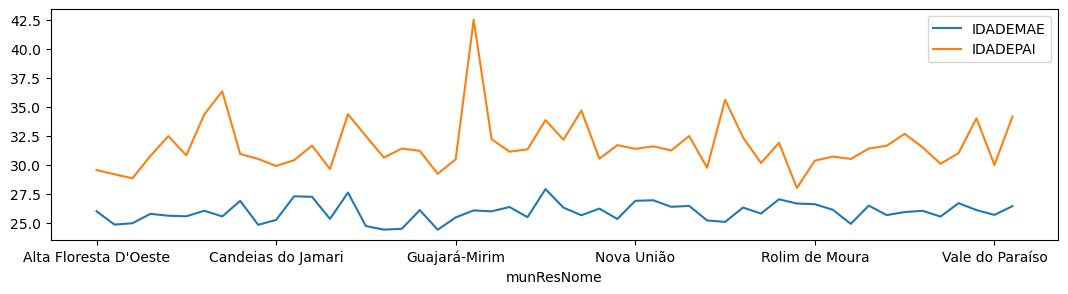

In [21]:
medias_idade_pais.plot(figsize=(13,3))

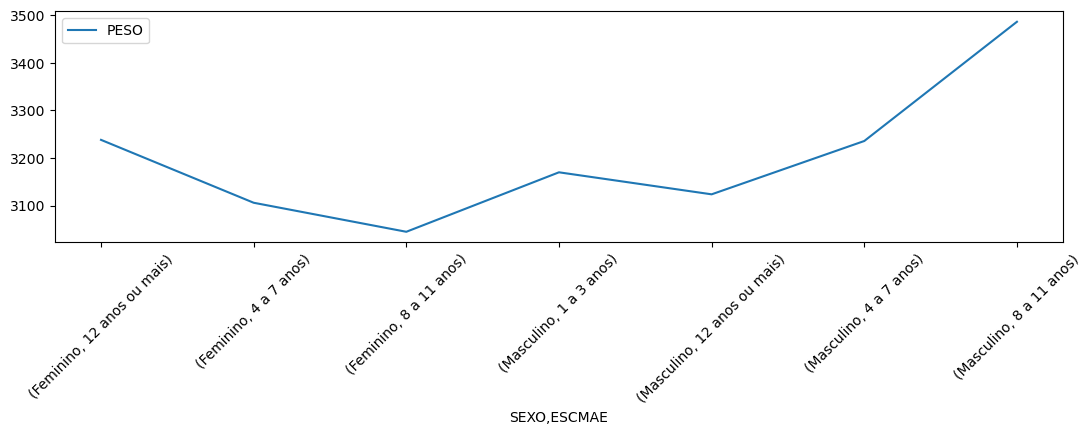

In [31]:
peso_medio.plot(figsize=(13,3)).tick_params(axis="x", rotation = 45)

In [36]:
quest_3

IDADEMAE                  IDADEPAI                  
               mínimo máximo     média   mínimo máximo      média
munResNome                                                       
Castanheiras       17     39  27.28125     17.0   43.0  30.392857

In [37]:
quest_4

IDADEMAE                   IDADEPAI                  
              mínimo máximo      média   mínimo máximo      média
munResNome                                                       
Porto Velho       14     44  26.596774     19.0   62.0  34.629032

#### Análise:
 - Através dos dados tratados, pude obter os seguintes insights:
    - As médias de idade dos pais são sempre maiores que as médias das mães;
    - Bebês do sexo masculino costumam nascer mais pesados;
    - O grau de escolaridade da mãe influencia no peso do bebê ao nascer. Quanto maior a escolaridade, maior o peso;
    - Porto Velho teve mais recém nascidos em março do que Castanheiras teve em todo o ano;
    - Apesar da grande diferença de população, as médias de idade das mães em ambos os municípios são bastante proximos.